# NCAR Innovator Program Project
### Notebook by: Maria J. Molina (NCAR/University of Maryland) and Jessica Moulite (Howard University)

Here we compare the NOAA Baltimore weather station temperature data with 2-m temperature data from ERA5. The objective of the comparison is to assess how representative state-of-the-art reanalysis is of local weather and trends, given its heavy use in climate assessment studies.

Importing packages

In [1]:
import datetime
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

Functions

In [2]:
def cel_to_far(tmp):
    """
    Convert celsius to farenheit
    """
    newtmp = []
    for i in tmp:
        if i == 99.9:
            newtmp.append(np.nan)
        if i != 99.9:
            newtmp.append((i * (9/5)) + 32)
    return np.array(newtmp)


def cel_to_nan(tmp):
    """
    Change 9999 to np.nan
    """
    newtmp = []
    for i in tmp:
        if i == 99.9:
            newtmp.append(np.nan)
        if i != 99.9:
            newtmp.append(i)
    return np.array(newtmp)


def convert_to_datetime(time_value):
    """
    Convert to a datetime object to be able to compute time difference.
    """
    return datetime.datetime(
        pd.to_datetime(time_value).year,
        pd.to_datetime(time_value).month,
        pd.to_datetime(time_value).day,
        pd.to_datetime(time_value).hour,
        pd.to_datetime(time_value).minute,
        pd.to_datetime(time_value).second,
    )


def compute_time_difference(a, b):
    """
    Compute time difference between two times.
    """
    if a >= b:
        return convert_to_datetime(a) - convert_to_datetime(b)
    if b > a:
        return convert_to_datetime(b) - convert_to_datetime(a)


def extract_era5_time(t_daily, t_full):
    """
    Extract the era5 temperature corresponding time.
    """
    era5_time_array = []

    for i, j in zip(t_daily.time, t_daily):

        tmp = t_full.sel(
            time=slice(i, pd.to_datetime(i.values) + datetime.timedelta(hours=23)))

        era5_time_array.append(tmp.where(tmp == j, drop=True).time.values)

    return era5_time_array

## Open ERA5 data (2008-present)

In [3]:
# open files
ds_ = xr.open_mfdataset(
    '/gpfs/fs1/collections/rda/data/ds633.0/e5.oper.an.sfc/*/e5.oper.an.sfc.128_167_2t.ll025sc.*.nc')['VAR_2T']

In [4]:
ds_

<xarray.DataArray 'VAR_2T' (time: 483600, latitude: 721, longitude: 1440)>
dask.array<concatenate, shape=(483600, 721, 1440), dtype=float32, chunksize=(744, 721, 1440), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float64 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * time       (time) datetime64[ns] 1967-04-01 ... 2022-05-31T23:00:00
Attributes: (12/14)
    long_name:                                          2 metre temperature
    short_name:                                         2t
    units:                                              K
    original_format:                                    WMO GRIB 1 with ECMWF...
    ecmwf_local_table:                                  128
    ecmwf_parameter:                                    167
    ...                                                 ...
    grid_specification:                                 0.25 degree x 0.25 de...
    rda_dataset:                                        ds633.0
    rda_dataset_url:                                    https:/rda.ucar.edu/d...
    rda_dataset_doi:                                    DOI: 10.5065/BH6N-5N20
    rda_dataset_group:                                  ERA5 atmospheric surf...
    QuantizeGranularBitGroomNumberOfSignificantDigits:  7

## Open NOAA BWI station data

In [7]:
BALT_temp = pd.read_csv('/glade/scratch/molina/3043180.csv', low_memory=False)

In [8]:
BALT_temp

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,SOURCE,REPORT_TYPE,CALL_SIGN,QUALITY_CONTROL,...,OD1,QUALITY_CONTROL.1,REM,REPORT_TYPE.1,SA1,SLP,SOURCE.1,TMP,VIS,WND
0,99729699999,"BALTIMORE MD, MD US",39.27,-76.57,10.0,2008-01-01T01:00:00,4,FM-18,BLTM2,V020,...,NaN,V020,NaN,FM-18,NaN,"99999,9",4,"+9999,9","999999,9,N,1","999,9,9,9999,9"
1,99729699999,"BALTIMORE MD, MD US",39.27,-76.57,10.0,2008-01-01T02:00:00,4,FM-18,BLTM2,V020,...,NaN,V020,SYN069CMAN 01024 BLTM2 46/// ///// 1//// 9013...,FM-18,NaN,"99999,9",4,"+9999,9","999999,9,N,1","999,9,9,9999,9"
2,99729699999,"BALTIMORE MD, MD US",39.27,-76.57,10.0,2008-01-01T03:00:00,4,FM-18,BLTM2,V020,...,NaN,V020,SYN069CMAN 01034 BLTM2 46/// ///// 1//// 9023...,FM-18,NaN,"99999,9",4,"+9999,9","999999,9,N,1","999,9,9,9999,9"
3,99729699999,"BALTIMORE MD, MD US",39.27,-76.57,10.0,2008-01-01T04:00:00,4,FM-18,BLTM2,V020,...,NaN,V020,SYN069CMAN 01044 BLTM2 46/// ///// 1//// 9033...,FM-18,NaN,"99999,9",4,"+9999,9","999999,9,N,1","999,9,9,9999,9"
4,99729699999,"BALTIMORE MD, MD US",39.27,-76.57,10.0,2008-01-01T05:00:00,4,FM-18,BLTM2,V020,...,NaN,V020,SYN069CMAN 01054 BLTM2 46/// ///// 1//// 9043...,FM-18,NaN,"99999,9",4,"+9999,9","999999,9,N,1","999,9,9,9999,9"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116808,99729699999,"BALTIMORE MD, MD US",39.27,-76.57,10.0,2022-08-01T17:00:00,4,FM-13,99999,V020,...,"5,99,0051,1,999",V020,SYN080BLTM2 46/// /3307 10261 40143 58005 9170...,FM-13,"+270,1","10143,1",4,"+0261,1","999999,9,9,9","330,1,N,0036,1"
116809,99729699999,"BALTIMORE MD, MD US",39.27,-76.57,10.0,2022-08-01T18:00:00,4,FM-13,99999,V020,...,"5,99,0046,1,999",V020,SYN080BLTM2 46/// /3604 10267 40140 58008 9180...,FM-13,"+270,1","10140,1",4,"+0267,1","999999,9,9,9","360,1,N,0021,1"
116810,99729699999,"BALTIMORE MD, MD US",39.27,-76.57,10.0,2022-08-01T19:00:00,4,FM-13,99999,V020,...,"5,99,0062,1,999",V020,SYN080BLTM2 46/// /3605 10274 40133 58015 9190...,FM-13,"+271,1","10133,1",4,"+0274,1","999999,9,9,9","360,1,N,0026,1"
116811,99729699999,"BALTIMORE MD, MD US",39.27,-76.57,10.0,2022-08-01T20:00:00,4,FM-13,99999,V020,...,"5,99,0057,1,999",V020,SYN080BLTM2 46/// /3608 10282 40126 58017 9200...,FM-13,"+273,1","10126,1",4,"+0282,1","999999,9,9,9","360,1,N,0041,1"


In [9]:
# subset the data using dates of interest (what is available in ERA5)
BALT_temp = BALT_temp[(
    BALT_temp['DATE'] >= str(
        pd.to_datetime(ds_.coords['time'].isel(time=0).values))) & (
    BALT_temp['DATE'] <= str(
        pd.to_datetime(ds_.coords['time'].isel(time=-1).values)))]

Clean up data from NOAA KMIA

In [10]:
time_date = []
temperature_C = []

for j, i in zip(BALT_temp['DATE'].values, BALT_temp['TMP'].values.astype(str)):

    time_date.append(j)

    # convert the string format to decimal format (originally in METAR code)
    temperature_C.append(float(i.split(',')[0][2:-1]+'.'+i.split(',')[0][-1]))

time_date = np.array(time_date)
temperature_C = np.array(temperature_C)

temperature_F = cel_to_far(temperature_C)
temperature_C = cel_to_nan(temperature_C)

In [11]:
# making into dataframe for easier manipulation

# initialize data of lists.
data = {'Datetime': pd.to_datetime(time_date),
        'Temperature_C': temperature_C,
        'Temperature_F': temperature_F,
        'Latitude': BALT_temp['LATITUDE'],
        'Longitude': BALT_temp['LONGITUDE'],
       }

# Create DataFrame and quality control
df = pd.DataFrame(data)
df = df.dropna()  # drop any nan values
df = df.drop_duplicates(keep='first')
# drop any duplicate rows
df = df[~df['Datetime'].duplicated()].drop_duplicates()

In [12]:
df

,Datetime,Temperature_C,Temperature_F,Latitude,Longitude
4845,2008-07-24 23:00:00,28.2,82.76,39.27,-76.57
4846,2008-07-25 00:00:00,27.7,81.86,39.27,-76.57
4847,2008-07-25 01:00:00,25.4,77.72,39.27,-76.57
4848,2008-07-25 02:00:00,25.0,77.00,39.27,-76.57
4849,2008-07-25 03:00:00,24.5,76.10,39.27,-76.57
...,...,...,...,...,...
115352,2022-05-30 19:00:00,28.8,83.84,39.27,-76.57
115353,2022-05-30 20:00:00,28.9,84.02,39.27,-76.57
115354,2022-05-30 21:00:00,29.3,84.74,39.27,-76.57
115355,2022-05-30 22:00:00,27.9,82.22,39.27,-76.57


## Select temperatures from ERA5 using NOAA Baltimore metadata (lat, lon, and hour)

In [13]:
ERA5_temperatures_C = []
ERA5_date = []

for lat, lon, date in zip(df['Latitude'], df['Longitude'] % 360, df['Datetime']):

    tmp = ds_.sel(longitude=lon, latitude=lat, time=date, method='nearest')

    ERA5_temperatures_C.append((tmp - 273.15).values)

    ERA5_date.append(tmp.coords['time'].values)

In [14]:
ERA5_temperatures_C = np.array(ERA5_temperatures_C)

In [15]:
ERA5_temperatures_F = cel_to_far(ERA5_temperatures_C)

In [16]:
# initialize data of lists.
data = {'Datetime': pd.to_datetime(ERA5_date),
        'Temperature_C': ERA5_temperatures_C,
        'Temperature_F': ERA5_temperatures_F,
       }

df_era5 = pd.DataFrame(data)

In [17]:
# drop duplicate rows
df = df[~df_era5['Datetime'].duplicated().values]
df_era5 = df_era5[~df_era5['Datetime'].duplicated()].drop_duplicates()

## Create new variables

### Daily max and min temperatures

In [18]:
# Daily NOAA temperature maximum
tmax_NOAA_daily = df.set_index('Datetime').resample('1D').max()

In [19]:
# Daily ERA5 temperature maximum
tmax_ERA5_daily = df_era5.set_index('Datetime').resample('1D').max()

In [20]:
# Daily NOAA temperature minimum
tmin_NOAA_daily = df.set_index('Datetime').resample('1D').min()

In [21]:
# Daily ERA5 temperature minimum
tmin_ERA5_daily = df_era5.set_index('Datetime').resample('1D').min()

### Time of daily max and min temperatures

In [102]:
# corresponding date/time for NOAA daily temperature maximum
tmax_NOAA_daily_datetime = df.set_index('Datetime').resample('1D').agg(
    lambda x: np.nan if x.count() == 0 else x.idxmax())['Temperature_C']

# remove missing dates
tmax_NOAA_daily = tmax_NOAA_daily[~np.isnat(tmax_NOAA_daily_datetime)]
tmax_NOAA_daily_datetime = tmax_NOAA_daily_datetime[~np.isnat(tmax_NOAA_daily_datetime)]

In [103]:
# corresponding date/time for NOAA daily temperature minimum
tmin_NOAA_daily_datetime = df.set_index('Datetime').resample('1D').agg(
    lambda x: np.nan if x.count() == 0 else x.idxmin())['Temperature_C']

# remove missing dates
tmin_NOAA_daily = tmin_NOAA_daily[~np.isnat(tmin_NOAA_daily_datetime)]
tmin_NOAA_daily_datetime = tmin_NOAA_daily_datetime[~np.isnat(tmin_NOAA_daily_datetime)]

In [105]:
# corresponding date/time for ERA5 daily temperature maximum
tmax_ERA5_daily_datetime = df_era5.set_index('Datetime').resample('1D').agg(
    lambda x: np.nan if x.count() == 0 else x.idxmax())['Temperature_C']

# remove missing dates
tmax_ERA5_daily = tmax_ERA5_daily[~np.isnat(tmax_ERA5_daily_datetime)]
tmax_ERA5_daily_datetime = tmax_ERA5_daily_datetime[~np.isnat(tmax_ERA5_daily_datetime)]

In [104]:
# corresponding date/time for ERA5 daily temperature minimum
tmin_ERA5_daily_datetime = df_era5.set_index('Datetime').resample('1D').agg(
    lambda x: np.nan if x.count() == 0 else x.idxmin())['Temperature_C']

# remove missing dates
tmin_ERA5_daily = tmin_ERA5_daily[~np.isnat(tmin_ERA5_daily_datetime)]
tmin_ERA5_daily_datetime = tmin_ERA5_daily_datetime[~np.isnat(tmin_ERA5_daily_datetime)]

### Corresponding temperatures at the time of the max/min of other product

In [106]:
# the NOAA temperature during the (i.e., same time as the
# daily ERA5 maximum temperature)

NOAA_temp_during_ERA5_tmax_C = []
NOAA_temp_during_ERA5_tmax_F = []

for i in tmax_ERA5_daily_datetime.values:

    NOAA_temp_during_ERA5_tmax_C.append(
        df.iloc[df.set_index('Datetime').index.get_loc(i, method='nearest')]['Temperature_C'])

    NOAA_temp_during_ERA5_tmax_F.append(
        df.iloc[df.set_index('Datetime').index.get_loc(i, method='nearest')]['Temperature_F'])

NOAA_temp_during_ERA5_tmax_C = np.array(NOAA_temp_during_ERA5_tmax_C)
NOAA_temp_during_ERA5_tmax_F = np.array(NOAA_temp_during_ERA5_tmax_F)

In [107]:
# the NOAA temperature during the (i.e., same time as the
# daily ERA5 minimum temperature)

NOAA_temp_during_ERA5_tmin_C = []
NOAA_temp_during_ERA5_tmin_F = []

for i in tmin_ERA5_daily_datetime.values:

    NOAA_temp_during_ERA5_tmin_C.append(
        df.iloc[df.set_index('Datetime').index.get_loc(i, method='nearest')]['Temperature_C'])

    NOAA_temp_during_ERA5_tmin_F.append(
        df.iloc[df.set_index('Datetime').index.get_loc(i, method='nearest')]['Temperature_F'])

NOAA_temp_during_ERA5_tmin_C = np.array(NOAA_temp_during_ERA5_tmin_C)
NOAA_temp_during_ERA5_tmin_F = np.array(NOAA_temp_during_ERA5_tmin_F)

In [108]:
# the ERA5 temperature during the (i.e., same time as the
# daily NOAA maximum temperature)

ERA5_temp_during_NOAA_tmax_C = []
ERA5_temp_during_NOAA_tmax_F = []

for i in tmax_NOAA_daily_datetime.values:

    ERA5_temp_during_NOAA_tmax_C.append(
        df_era5.iloc[df_era5.set_index('Datetime').index.get_loc(
            i, method='nearest')]['Temperature_C'])

    ERA5_temp_during_NOAA_tmax_F.append(
        df_era5.iloc[df_era5.set_index('Datetime').index.get_loc(
            i, method='nearest')]['Temperature_F'])

ERA5_temp_during_NOAA_tmax_C = np.array(ERA5_temp_during_NOAA_tmax_C)
ERA5_temp_during_NOAA_tmax_F = np.array(ERA5_temp_during_NOAA_tmax_F)

In [109]:
# the ERA5 temperature during the (i.e., same time as the
# daily NOAA minimum temperature)

ERA5_temp_during_NOAA_tmin_C = []
ERA5_temp_during_NOAA_tmin_F = []

for i in tmin_NOAA_daily_datetime.values:

    ERA5_temp_during_NOAA_tmin_C.append(
        df_era5.iloc[df_era5.set_index('Datetime').index.get_loc(
            i, method='nearest')]['Temperature_C'])

    ERA5_temp_during_NOAA_tmin_F.append(
        df_era5.iloc[df_era5.set_index('Datetime').index.get_loc(
            i, method='nearest')]['Temperature_F'])

ERA5_temp_during_NOAA_tmin_C = np.array(ERA5_temp_during_NOAA_tmin_C)
ERA5_temp_during_NOAA_tmin_F = np.array(ERA5_temp_during_NOAA_tmin_F)

### differences (temperature)

In [110]:
# difference between NOAA temperature maximum and
# the ERA5 corresponding temperature at that time (C)
tmax_daily_difference_C = tmax_NOAA_daily['Temperature_C'] - ERA5_temp_during_NOAA_tmax_C

In [111]:
# difference between NOAA temperature maximum and
# the ERA5 corresponding temperature at that time (F)
tmax_daily_difference_F = tmax_NOAA_daily['Temperature_F'] - ERA5_temp_during_NOAA_tmax_F

In [112]:
# difference between NOAA temperature minimum and
# the ERA5 corresponding temperature at that time (C)
tmin_daily_difference_C = tmin_NOAA_daily['Temperature_C'] - ERA5_temp_during_NOAA_tmin_C

In [113]:
# difference between NOAA temperature minimum and
# the ERA5 corresponding temperature at that time (C)
tmin_daily_difference_F = tmin_NOAA_daily['Temperature_F'] - ERA5_temp_during_NOAA_tmin_F

### compute time differences

In [129]:
# absolute time difference between daily maximum temperature (ERA5 and NOAA)
tmax_diff = []
for i, j in zip(pd.to_datetime(tmax_NOAA_daily_datetime), tmax_ERA5_daily_datetime):
    tmax_diff.append(compute_time_difference(i, j))
tmax_diff = np.array(tmax_diff)

In [130]:
# absolute time difference between daily minimum temperature (ERA5 and NOAA)
tmin_diff = []
for i, j in zip(pd.to_datetime(tmin_NOAA_daily_datetime), tmin_ERA5_daily_datetime):
    tmin_diff.append(compute_time_difference(i, j))
tmin_diff = np.array(tmin_diff)

### create single csv file

In [136]:
data = {

    'NOAA_BALT_Temperature_Daily_Max (C)': tmax_NOAA_daily['Temperature_C'],
    'NOAA_BALT_Temperature_Daily_Max (F)': tmax_NOAA_daily['Temperature_F'],
    'NOAA_BALT_Temperature_Daily_Max_Datetime': tmax_NOAA_daily_datetime,

    'NOAA_BALT_Temperature_Daily_Min (C)': tmin_NOAA_daily['Temperature_C'],
    'NOAA_BALT_Temperature_Daily_Min (F)': tmin_NOAA_daily['Temperature_F'],
    'NOAA_BALT_Temperature_Daily_Min_Datetime': tmin_NOAA_daily_datetime,

    'ERA5_Temperature_Daily_Max (C)': tmax_ERA5_daily['Temperature_C'],
    'ERA5_Temperature_Daily_Max (F)': tmax_ERA5_daily['Temperature_F'],
    'ERA5_Temperature_Daily_Max_Datetime': tmax_ERA5_daily_datetime,

    'ERA5_Temperature_Daily_Min (C)': tmin_ERA5_daily['Temperature_C'],
    'ERA5_Temperature_Daily_Min (F)': tmin_ERA5_daily['Temperature_F'],
    'ERA5_Temperature_Daily_Min_Datetime': tmin_ERA5_daily_datetime,


    'ERA5_Corresponding_Temperature_During_NOAA_BALT_Daily_Max (C)': ERA5_temp_during_NOAA_tmax_C,
    'ERA5_Corresponding_Temperature_During_NOAA_BALT_Daily_Max (F)': ERA5_temp_during_NOAA_tmax_F,

    'ERA5_Corresponding_Temperature_During_NOAA_BALT_Daily_Min (C)': ERA5_temp_during_NOAA_tmin_C,
    'ERA5_Corresponding_Temperature_During_NOAA_BALT_Daily_Min (F)': ERA5_temp_during_NOAA_tmin_F,

    'NOAA_BALT_Corresponding_Temperature_During_ERA5_Daily_Max (C)': NOAA_temp_during_ERA5_tmax_C,
    'NOAA_BALT_Corresponding_Temperature_During_ERA5_Daily_Max (F)': NOAA_temp_during_ERA5_tmax_F,

    'NOAA_BALT_Corresponding_Temperature_During_ERA5_Daily_Min (C)': NOAA_temp_during_ERA5_tmin_C,
    'NOAA_BALT_Corresponding_Temperature_During_ERA5_Daily_Min (F)': NOAA_temp_during_ERA5_tmin_F,


    'Daily_Temperature_Max_Difference (C)': tmax_daily_difference_C.values,
    'Daily_Temperature_Max_Difference (F)': tmax_daily_difference_F.values,

    'Daily_Temperature_Min_Difference (C)': tmin_daily_difference_C.values,
    'Daily_Temperature_Min_Difference (F)': tmin_daily_difference_F.values,

    'Absolute_time_difference_tmax_ERA5_NOAA_BALT (day H:M:S)': tmax_diff,
    'Absolute_time_difference_tmin_ERA5_NOAA_BALT (day H:M:S)': tmin_diff,

       }

In [137]:
df_FINAL = pd.DataFrame(data)

In [138]:
df_FINAL

,NOAA_BALT_Temperature_Daily_Max (C),NOAA_BALT_Temperature_Daily_Max (F),NOAA_BALT_Temperature_Daily_Max_Datetime,NOAA_BALT_Temperature_Daily_Min (C),NOAA_BALT_Temperature_Daily_Min (F),NOAA_BALT_Temperature_Daily_Min_Datetime,ERA5_Temperature_Daily_Max (C),ERA5_Temperature_Daily_Max (F),ERA5_Temperature_Daily_Max_Datetime,ERA5_Temperature_Daily_Min (C),...,NOAA_BALT_Corresponding_Temperature_During_ERA5_Daily_Max (C),NOAA_BALT_Corresponding_Temperature_During_ERA5_Daily_Max (F),NOAA_BALT_Corresponding_Temperature_During_ERA5_Daily_Min (C),NOAA_BALT_Corresponding_Temperature_During_ERA5_Daily_Min (F),Daily_Temperature_Max_Difference (C),Daily_Temperature_Max_Difference (F),Daily_Temperature_Min_Difference (C),Daily_Temperature_Min_Difference (F),Absolute_time_difference_tmax_ERA5_NOAA_BALT (day H:M:S),Absolute_time_difference_tmin_ERA5_NOAA_BALT (day H:M:S)
Datetime,,,,,,,,,,,,,,,,,,,,,
2008-07-24,28.2,82.76,2008-07-24 23:00:00,28.2,82.76,2008-07-24 23:00:00,26.317133,79.370839,2008-07-24 23:00:00,26.317133,...,28.2,82.76,28.2,82.76,1.882867,3.389161,1.882867,3.389161,0 days 00:00:00,0 days 00:00:00
2008-07-25,29.8,85.64,2008-07-25 22:00:00,20.7,69.26,2008-07-25 11:00:00,28.515070,83.327126,2008-07-25 20:00:00,19.598108,...,29.3,84.74,21.9,71.42,2.848285,5.126912,-0.183753,-0.330755,0 days 02:00:00,0 days 02:00:00
2008-07-26,29.5,85.10,2008-07-26 19:00:00,22.6,72.68,2008-07-26 10:00:00,28.602503,83.484505,2008-07-26 20:00:00,22.025537,...,29.1,84.38,22.6,72.68,1.036474,1.865654,0.574463,1.034033,0 days 01:00:00,0 days 00:00:00
2008-07-27,28.6,83.48,2008-07-27 16:00:00,23.2,73.76,2008-07-27 11:00:00,27.636744,81.746138,2008-07-27 16:00:00,23.226892,...,28.6,83.48,23.4,74.12,0.963256,1.733862,-0.299811,-0.539660,0 days 00:00:00,0 days 01:00:00
2008-07-28,30.2,86.36,2008-07-28 21:00:00,22.0,71.60,2008-07-28 10:00:00,28.604761,83.488570,2008-07-28 21:00:00,20.506800,...,30.2,86.36,22.4,72.32,1.595239,2.871430,1.421759,2.559166,0 days 00:00:00,0 days 01:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-26,21.6,70.88,2022-05-26 20:00:00,15.8,60.44,2022-05-26 09:00:00,20.648523,69.167342,2022-05-26 22:00:00,15.354548,...,21.4,70.52,16.2,61.16,1.743774,3.138793,0.443164,0.797695,0 days 02:00:00,0 days 03:00:00
2022-05-27,24.3,75.74,2022-05-27 17:00:00,19.4,66.92,2022-05-27 11:00:00,22.695765,72.852376,2022-05-27 18:00:00,18.987818,...,20.1,68.18,19.9,67.82,2.042590,3.676662,-0.754322,-1.357779,0 days 01:00:00,0 days 02:00:00
2022-05-28,25.4,77.72,2022-05-28 20:00:00,17.8,64.04,2022-05-28 10:00:00,23.930811,75.075460,2022-05-28 22:00:00,18.599939,...,24.8,76.64,18.1,64.58,2.035931,3.664676,-0.903760,-1.626768,0 days 02:00:00,0 days 01:00:00


### data visualizations

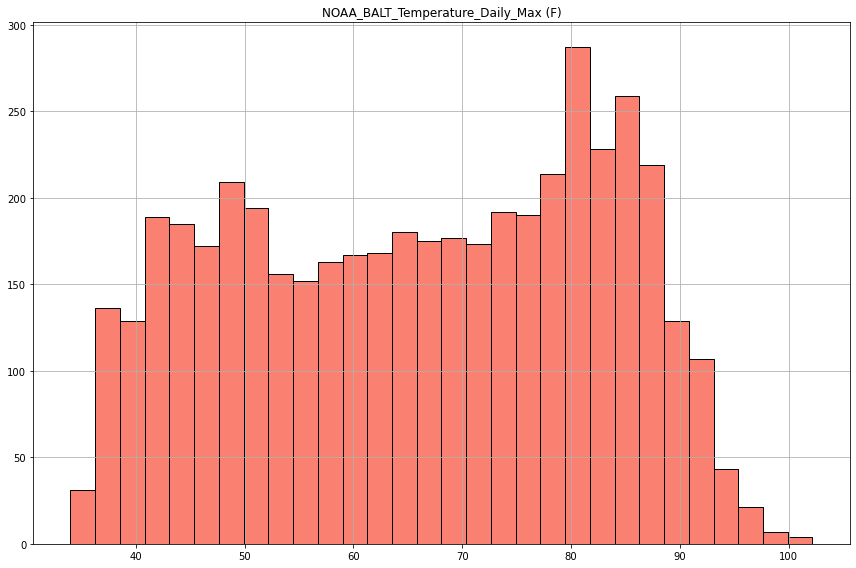

In [139]:
fig = df_FINAL.hist(
    'NOAA_BALT_Temperature_Daily_Max (F)', edgecolor='k', facecolor='salmon', bins=30, figsize=(12,8))
plt.tight_layout()
# plt.savefig('/Users/molina/Desktop/ShadingDade_Temperature_Daily_Max.png', dpi=500)
plt.show()

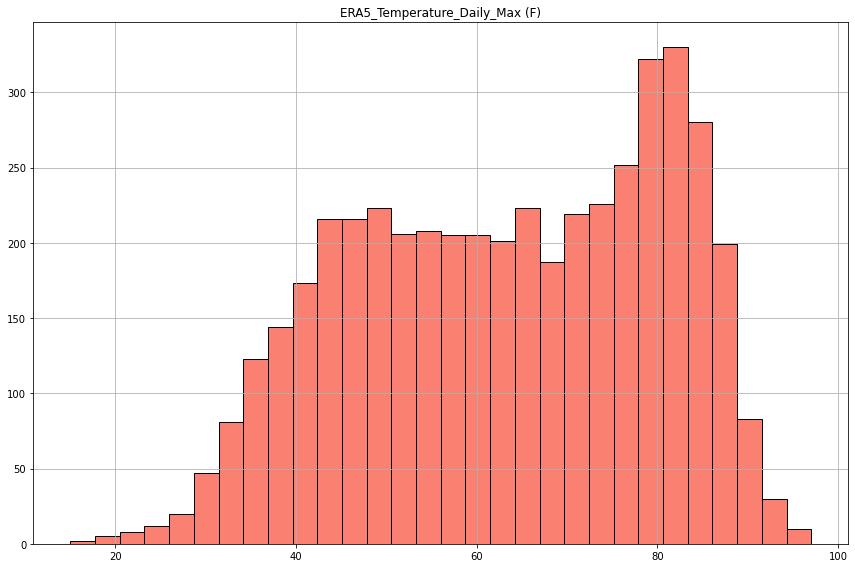

In [140]:
fig = df_FINAL.hist(
    'ERA5_Temperature_Daily_Max (F)', edgecolor='k', facecolor='salmon', bins=30, figsize=(12,8))
plt.tight_layout()
# plt.savefig('/Users/molina/Desktop/ShadingDade_Temperature_Daily_Max.png', dpi=500)
plt.show()

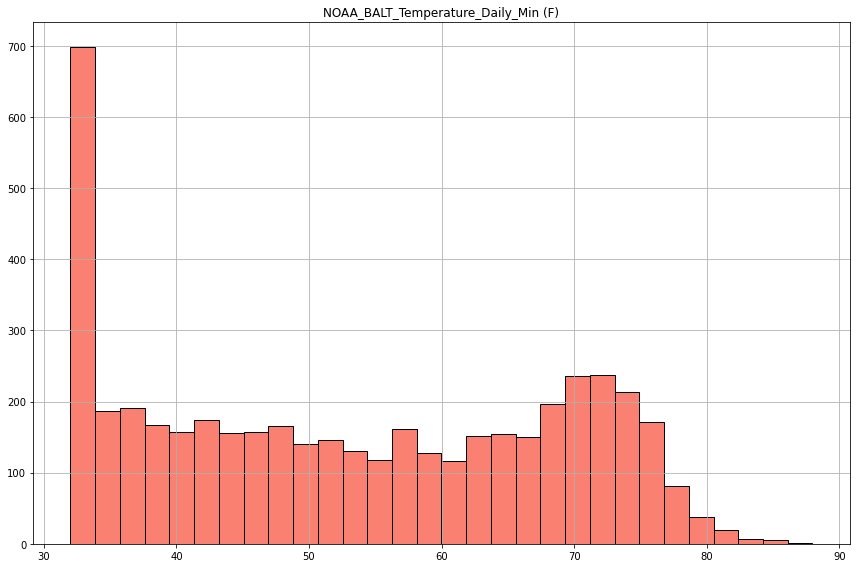

In [141]:
fig = df_FINAL.hist(
    'NOAA_BALT_Temperature_Daily_Min (F)', edgecolor='k', facecolor='salmon', bins=30, figsize=(12,8))
plt.tight_layout()
# plt.savefig('/Users/molina/Desktop/ShadingDade_Temperature_Daily_Max.png', dpi=500)
plt.show()

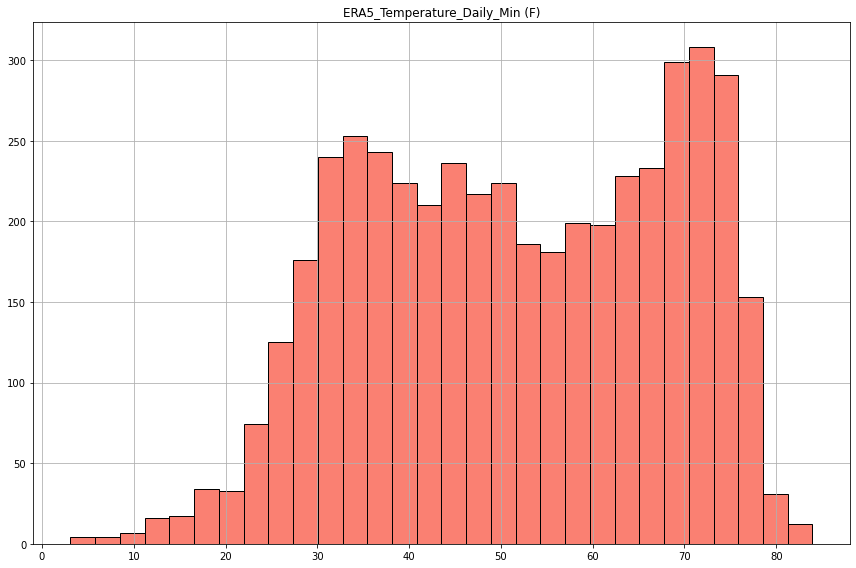

In [142]:
fig = df_FINAL.hist(
    'ERA5_Temperature_Daily_Min (F)', edgecolor='k', facecolor='salmon', bins=30, figsize=(12,8))
plt.tight_layout()
# plt.savefig('/Users/molina/Desktop/ShadingDade_Temperature_Daily_Max.png', dpi=500)
plt.show()

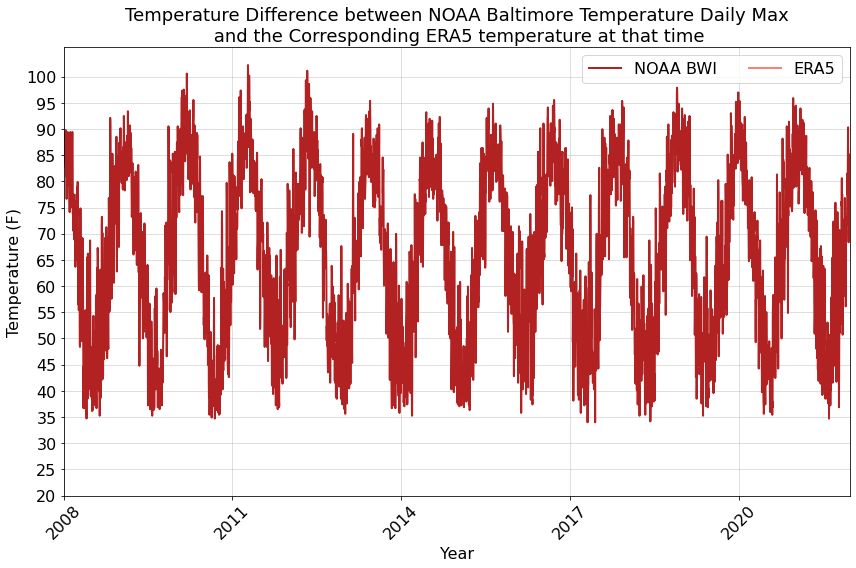

In [148]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_title(
    'Temperature Difference between NOAA Baltimore Temperature Daily Max\n and the Corresponding ERA5 temperature at that time', 
    fontsize=18)

ls0, = ax.plot(df_FINAL['NOAA_BALT_Temperature_Daily_Max (F)'].values, color='firebrick', lw=2.0)
#ls1, = ax.plot(df_FINAL['ERA5_Corresponding_Temperature_During_NOAA_BALT_Daily_Max (F)'].values, color='salmon', lw=2.0)

ax.legend([ls0, ls1], ['NOAA BWI', 'ERA5'],
          fancybox=True, fontsize=16, ncol=2)

ax.set_xticks(np.arange(0, df_FINAL['ERA5_Corresponding_Temperature_During_NOAA_BALT_Daily_Max (F)'].values.shape[0])[::1000])
ax.set_xticklabels(pd.to_datetime(tmax_NOAA_daily_datetime).dt.year[::1000],
                   rotation=45, fontsize=16)
ax.set_xlabel('Year', fontsize=16)

ax.set_yticks(np.arange(20,101,1)[::5])
ax.set_yticklabels(np.arange(20,101,1)[::5], fontsize=16)
ax.set_ylabel('Temperature (F)', fontsize=16)

ax.grid('--', alpha=0.5)
ax.margins(x=0)

plt.tight_layout()
# plt.savefig('/Users/molina/Desktop/TempDiff_SDandERA5.png', dpi=500)
plt.show()

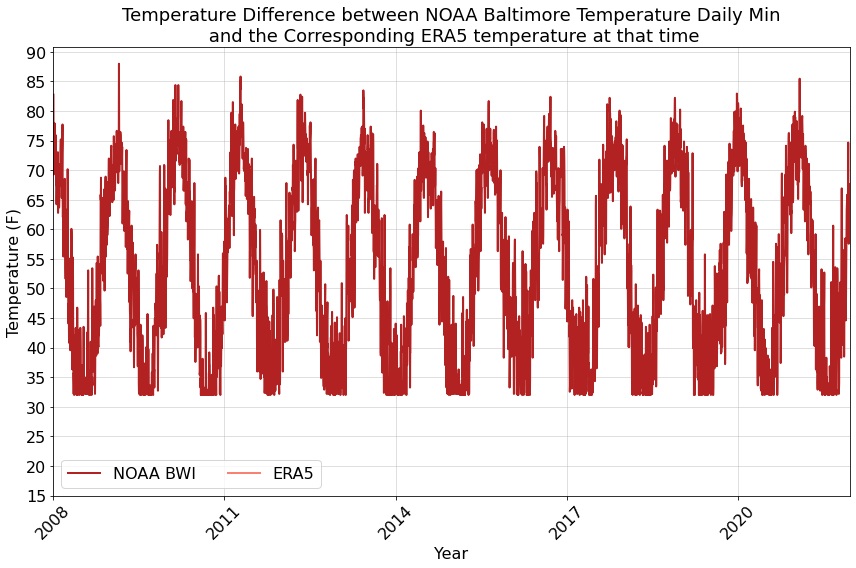

In [147]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_title(
    'Temperature Difference between NOAA Baltimore Temperature Daily Min\n and the Corresponding ERA5 temperature at that time', 
    fontsize=18)

ls0, = ax.plot(df_FINAL['NOAA_BALT_Temperature_Daily_Min (F)'].values, color='firebrick', lw=2.0)
#ls1, = ax.plot(df_FINAL['ERA5_Corresponding_Temperature_During_NOAA_BALT_Daily_Min (F)'].values, color='salmon', lw=2.0)

ax.legend([ls0, ls1], ['NOAA BWI', 'ERA5'],
          fancybox=True, fontsize=16, ncol=2)

ax.set_xticks(np.arange(0, df_FINAL['ERA5_Corresponding_Temperature_During_NOAA_BALT_Daily_Min (F)'].values.shape[0])[::1000])
ax.set_xticklabels(pd.to_datetime(tmax_NOAA_daily_datetime).dt.year[::1000],
                   rotation=45, fontsize=16)
ax.set_xlabel('Year', fontsize=16)

ax.set_yticks(np.arange(15,91,1)[::5])
ax.set_yticklabels(np.arange(15,91,1)[::5], fontsize=16)
ax.set_ylabel('Temperature (F)', fontsize=16)

ax.grid('--', alpha=0.5)
ax.margins(x=0)

plt.tight_layout()
# plt.savefig('/Users/molina/Desktop/TempDiff_SDandERA5.png', dpi=500)
plt.show()

## save csv file

In [145]:
df_FINAL.to_csv(
    '/glade/scratch/molina/NOAA_BALT_ERA5_Temperature_2008-2022.csv')